In [1]:
import os

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATAFRAMES = os.path.join("..", "..", "results", "dataframes", "")
FIGURES = os.path.join("..", "..", "results", "figures", "")

# Data preprocessing

In [3]:
df = pd.read_csv(os.path.join(DATAFRAMES, "dataframe_LFR.csv"))
print(df.columns)

Index(['system', 'theta', 'embedding', 'mu', 't1', 't2', 'prob', 'accuracy',
       'auroc', 'pr', 'intercept', 'coef_distances', 'coef_degrees'],
      dtype='object')


In [4]:
df = df.melt(
    id_vars=["embedding", "theta", "mu", "intercept", "coef_distances", "coef_degrees"],
    value_vars=["accuracy", "auroc", "pr"],
    var_name="perftype", value_name="perfval"
).melt(
    id_vars=["embedding", "theta", "mu", "perftype", "perfval"],
    value_vars=["intercept", "coef_distances", "coef_degrees"],
    var_name="featuretype",
    value_name="featureval"
)

# Figures

## Faceted

In [5]:
df_ = df.query("perftype == 'auroc' & embedding != 'Isomap'")

<Figure size 640x480 with 0 Axes>

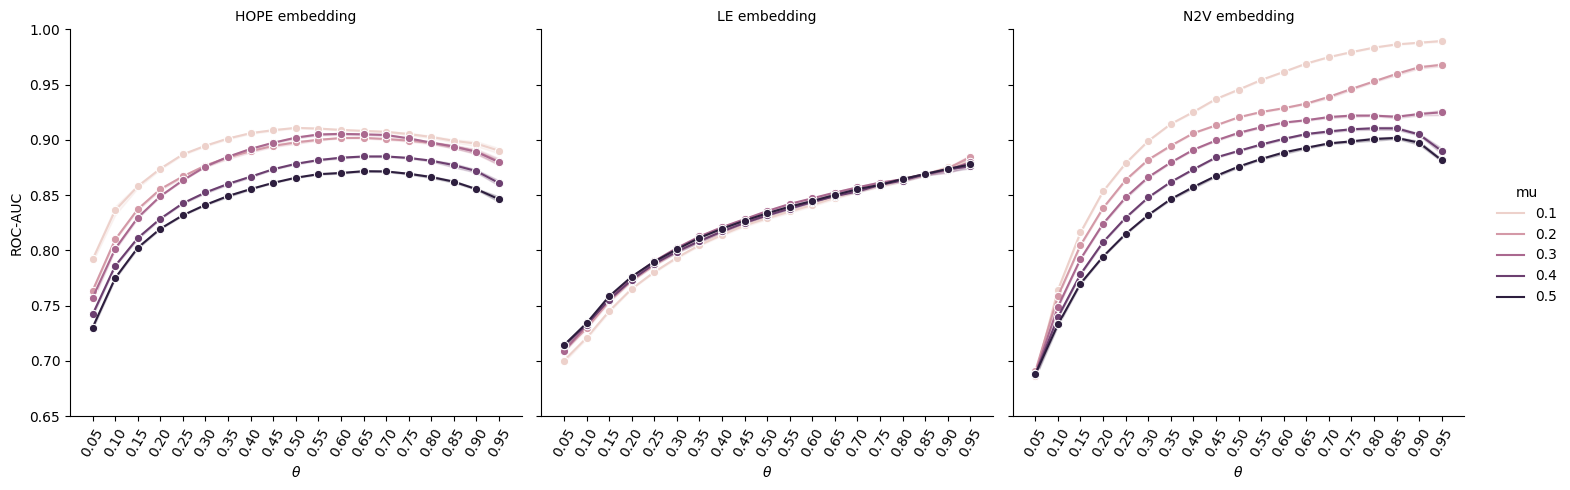

In [6]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="perfval",
    hue="mu",
    col="embedding",
    marker="o",
)

# Adjust axes
g.set_axis_labels(r'$\theta$', 'ROC-AUC')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique()),
    ylim=(0.65, 1), yticks=np.linspace(0.65, 1.0, 8))
g.tick_params(axis="x", labelrotation=60)
g.tick_params(axis="y", which="minor")

# Adjust subplots
g.set_titles(col_template="{col_name} embedding")

# Adjust figure
g.tight_layout()
# g.refline(y=0.5)

# Save to disk
# g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")

## Coefficients

Text(0.5, 0.98, 'Coefficients - Plain view')

<Figure size 640x480 with 0 Axes>

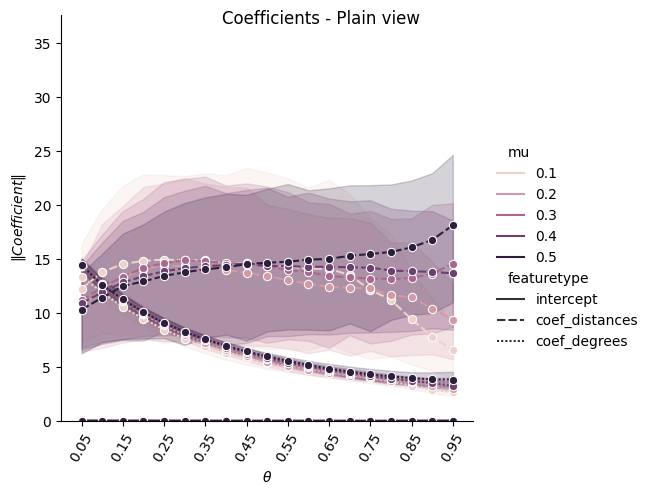

In [12]:
# Instantiate figure
plt.figure()

df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="featureval",
    style="featuretype",
    hue="mu",
    marker="o"
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique())[::2],
    ylim=(0, df_["featureval"].max()),
)
g.tick_params(axis="x", labelrotation=60)


# Adjust subplots
# g.set_titles(col_template="{col_name} embedding")

# Adjust figure
g.tight_layout()
g.fig.suptitle("Coefficients - Plain view")

# # Save to disk
# # g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")

Text(0.5, 0.98, 'Distance coefficients')

<Figure size 640x480 with 0 Axes>

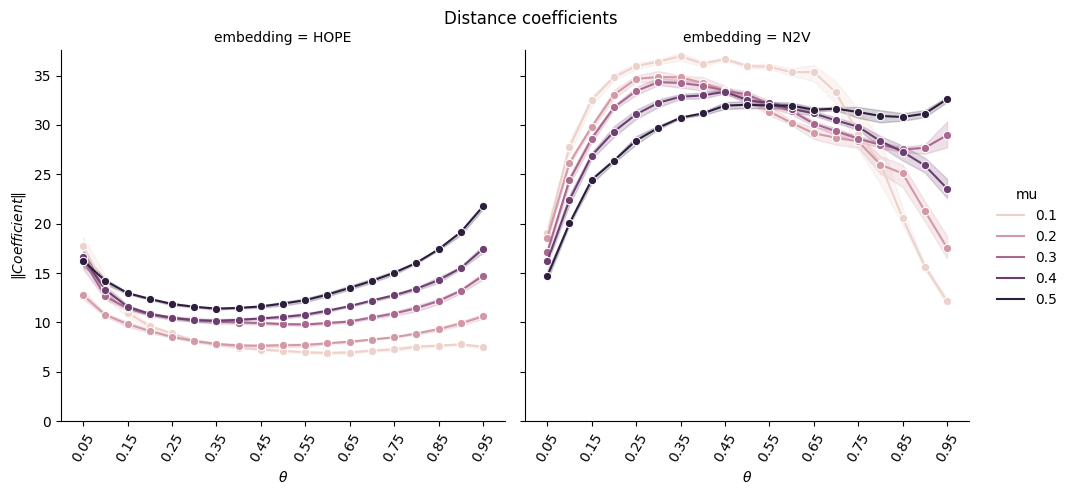

In [15]:
# Instantiate figure
plt.figure()

df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))

# Plot data
g = sns.relplot(
    data=df_.query("featuretype == 'coef_distances' & embedding != 'LE'"), kind="line",
    x="theta", y="featureval",
    col="embedding",
    hue="mu",
    marker="o"
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique())[::2],
    ylim=(0, df_["featureval"].max()),
)
g.tick_params(axis="x", labelrotation=60)


# Adjust subplots
# g.set_titles(col_template="{col_name} embedding")

# Adjust figure
g.tight_layout()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distance coefficients")

# # Save to disk
# # g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")

Text(0.5, 0.98, 'LE distance coefficients')

<Figure size 640x480 with 0 Axes>

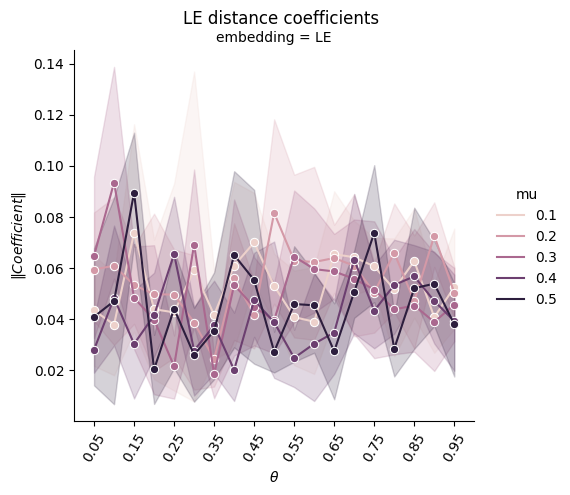

In [16]:
# Instantiate figure
plt.figure()

df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))

# Plot data
g = sns.relplot(
    data=df_.query("featuretype == 'coef_distances' & embedding == 'LE'"), kind="line",
    x="theta", y="featureval",
    col="embedding",
    hue="mu",
    marker="o"
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique())[::2],
    # ylim=(0, df_["featureval"].max()),
)
g.tick_params(axis="x", labelrotation=60)


# Adjust subplots
# g.set_titles(col_template="{col_name} embedding")

# Adjust figure
g.tight_layout()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("LE distance coefficients")

# # Save to disk
# # g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")

Text(0.5, 0.98, 'Degree coefficients')

<Figure size 640x480 with 0 Axes>

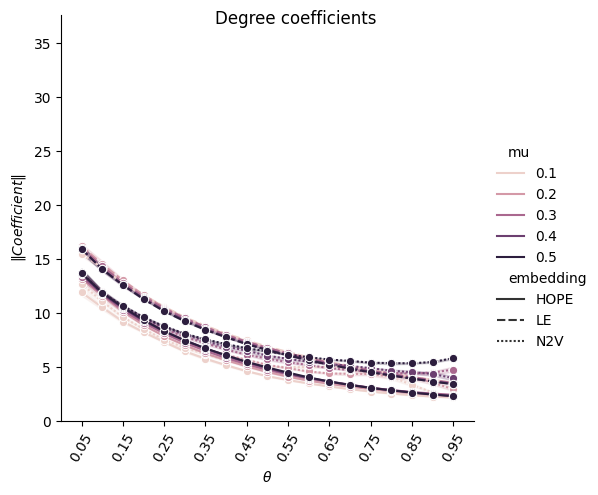

In [17]:
# Instantiate figure
plt.figure()

df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))

# Plot data
g = sns.relplot(
    data=df_.query("featuretype == 'coef_degrees'"), kind="line",
    x="theta", y="featureval",
    # col="embedding",
    style="embedding",
    hue="mu",
    marker="o"
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique())[::2],
    ylim=(0, df_["featureval"].max()),
)
g.tick_params(axis="x", labelrotation=60)


# Adjust subplots
# g.set_titles(col_template="{col_name} embedding")

# Adjust figure
g.tight_layout()
g.fig.suptitle("Degree coefficients")

# # Save to disk
# # g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")

Text(0.5, 0.98, 'Intercepts (balanced layers)')

<Figure size 640x480 with 0 Axes>

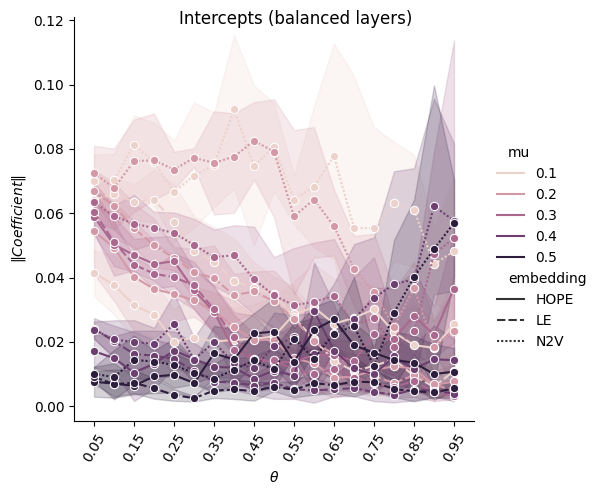

In [18]:
# Instantiate figure
plt.figure()

df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))

# Plot data
g = sns.relplot(
    data=df_.query("featuretype == 'intercept'"), kind="line",
    x="theta", y="featureval",
    # col="embedding",
    style="embedding",
    hue="mu",
    marker="o"
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.set(
    xlim=(0,1), xticks=sorted(df_["theta"].unique())[::2],
    # ylim=(0, df_["featureval"].max()),
)
g.tick_params(axis="x", labelrotation=60)


# Adjust subplots
# g.set_titles(col_template="{col_name} embedding")

# Adjust figure
g.tight_layout()
g.fig.suptitle("Intercepts (balanced layers)")

# # Save to disk
# # g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-layer_col-embedding_row-system_data-reals-cut-london.png"), transparent=False, facecolor="white")